#  Question 3 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from time import time

In this exercise we will once again solve Burger's equation, given by

\begin{equation}
\frac{\partial u}{\partial t} + \epsilon \frac{\partial}{\partial x}\Big(\frac{u^2}{2}\Big) = 0,
\end{equation}

however unlike in PS8, we will now use a mroe accurate method, the Lax-Wendroff method. We start by rearranging Burger's equation to obtain an expression for the second order time partial of $u$:
\begin{align*}
& \text{Re-arrange Burger's equation:} & \frac{\partial u}{\partial t} &= - \epsilon \frac{\partial}{\partial x}\Big(\frac{u^2}{2}\Big) \\
& \text{Take partial w.r.t. $t$:} & \frac{\partial^2 u}{\partial t^2} &= - \epsilon \frac{\partial}{\partial x}\Big(\frac{1}{2}\frac{\partial u^2}{\partial t} \Big) \\
& & &= - \epsilon \frac{\partial}{\partial x}\Big(\frac{1}{2}2 u \frac{\partial u}{\partial t} \Big) \\
& \text{Plug in original expression:} & &= - \epsilon \frac{\partial}{\partial x}\Big(- u \epsilon \frac{\partial}{\partial x}\Big(\frac{u^2}{2}\Big) \Big) \\
& \text{Re-arrange:} & &= \epsilon ^ { 2 } \frac { \partial } { \partial x } \left[ u \frac { \partial } { \partial x } \left( \frac { u ^ { 2 } } { 2 } \right) \right]
\end{align*}

We then taylor expand a time derivative of $u$ and plug in the above to obtain:
\begin{align*}
& \text{Taylor expand:} & u(x, t + \Delta t) &= u ( x , t ) + \frac { \partial u } { \partial t } \Delta t + \frac { 1 } { 2 } \frac { \partial ^ { 2 } u } { \partial t ^ { 2 } } \Delta t ^ { 2 } \\
& \text{Plug in $\frac{\partial u}{\partial t}$:} & &= u ( x , t ) - \epsilon \frac{\partial}{\partial x}\Big(\frac{u^2}{2}\Big) \Delta t + \frac { 1 } { 2 } \frac { \partial ^ { 2 } u } { \partial t ^ { 2 } } \Delta t ^ { 2 } \\
& \text{Plug in $\frac{\partial^2 u}{\partial t^2}$:} & &= u ( x , t ) - \epsilon \frac{\partial}{\partial x}\Big(\frac{u^2}{2}\Big) \Delta t + \frac { 1 } { 2 } \epsilon ^ { 2 } \frac { \partial } { \partial x } \left[ u \frac { \partial } { \partial x } \left( \frac { u ^ { 2 } } { 2 } \right) \right] \Delta t ^ { 2 } \\
& \text{Re-arrange:} & &= u(x,t)- \frac{\epsilon \Delta t}{2} \frac{\partial}{\partial x} u^2 + \left( \frac{\epsilon \Delta t}{2} \right) ^2 \frac{\partial}{\partial x} \left[ u \frac{\partial}{\partial x} u^2  \right] \\
\end{align*}

In order to discretise these equations, we use central differences to approximate the following quatities:
\begin{align*}
\frac { \partial} { \partial x } u ^ { 2 } ( x , t ) & = \frac { u ^ { 2 } ( x + \Delta x , t ) - u ^ { 2 } ( x - \Delta x , t ) } { 2 \Delta x } 
\\ &= \frac { \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } } { 2 \Delta x } \\\\
\frac { \partial } { \partial x } \left[ u \frac { \partial } { \partial x } u ^ { 2 } \right] &= \frac { 1 } { \Delta x } \left[ u ( x + \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x + \Delta x / 2 , t ) } { \partial x } - u ( x - \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x - \Delta x / 2 , t ) } { \partial x } \right],
\end{align*}

\begin{align*}
& \text{where} & u( x \pm \frac { \Delta x } { 2 } , t ) &= \frac { u ( x , t ) + u ( x \pm \Delta x , t ) } { 2 } \\ 
& & &= \frac { u _ { i } ^ { j } + u _ { i \pm 1 } ^ { j } } { 2 } \\
& \text{and} & \frac { \partial u ^ { 2 } ( x \pm \Delta x / 2 , t ) } { \partial x } & = \frac { u ^ { 2 } ( x \pm \Delta x , t ) - u ^ { 2 } ( x , t ) } { \pm \Delta x } \\ 
& & &= \frac { \left( u _ { i \pm 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i } ^ { j } \right) ^ { 2 } } { \pm \Delta x } \quad \text{so} \\
\end{align*}

\begin{align*}
\frac { \partial } { \partial x } \left[ u \frac { \partial } { \partial x } u ^ { 2 } \right] &= \frac{1}{\Delta x} \left[ \frac { u _ { i } ^ { j } + u _ { i + 1 } ^ { j } } { 2 } \frac { \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i } ^ { j } \right) ^ { 2 } } {\Delta x } + \frac { u _ { i } ^ { j } + u _ { i -1 } ^ { j } } { 2 } \frac { \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i } ^ { j } \right) ^ { 2 } } {\Delta x } \right] \\
&= \frac{1}{\Delta x} \left[ \frac{u_{i}^{j}(u_{i+1}^{j})^2 - (u_{i}^{j})^3 + (u_{i+1}^{j})^3 - u_{i+1}^{j}(u_{i}^{j})^2 + u_{i}^{j}(u_{i-1}^{j})^2 - (u_{i}^{j})^3 + (u_{i-1}^{j})^3 - u_{i-1}^{j}(u_{i}^{j})^2}{2 \Delta x} \right] \\
&= \frac{1}{2 (\Delta x)^2} \left[ (u_{i-1}^{j})^3 + u_{i}^{j}(u_{i-1}^{j})^2 - u_{i-1}^{j}(u_{i}^{j})^2 - 2(u_{i}^{j})^3 - u_{i+1}^{j}(u_{i}^{j})^2 + u_{i}^{j}(u_{i+1}^{j})^2 + (u_{i+1}^{j})^3 \right]
\end{align*}

Therefore, by putting everything together we can express $u _ { i } ^ { j + 1 } = u ( x , t + \Delta t )$ as:
\begin{align*}
u_{i}^{j+1} &= u_{i}^{j} + \frac{\beta}{4} \left[ \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } \right] \\ &+ \frac{\beta^2}{8} \left[ (u_{i-1}^{j})^3 + u_{i}^{j}(u_{i-1}^{j})^2 - u_{i-1}^{j}(u_{i}^{j})^2 - 2(u_{i}^{j})^3 - u_{i+1}^{j}(u_{i}^{j})^2 + u_{i}^{j}(u_{i+1}^{j})^2 + (u_{i+1}^{j})^3 \right],
\end{align*}
where $\beta= \epsilon \Delta t / \Delta x$.

# Part B

We now implement the above equation to solve Burger's equation numerically. We will use the same constants and initial condition as in PS8. Furthermore we will compare our solution to the leapfrog method. We begin with ournewly-derived Lax-Wendroff method:

In [2]:
# Constants
eps = 1      # epsilon
h = 0.005    # Time-step
L = 2*np.pi  # Length of x grid
N = 315      # Number of x points (taken s.t. a~0.02)
a = L/N      # Spacing between x points
b = eps*h/a  # beta
Tf = 1.5     # Final time

# Create arrays
x = np.linspace(0,L,N+1)    # grid of positions
u = np.sin(x)  # initialize u(x,t=0)
u[0] , u[-1] = 0. , 0.  # boundary conditions (just in case)

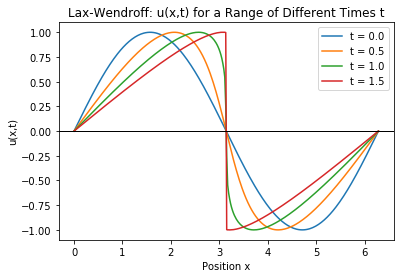

Total seconds to calculate:  0.025404930114746094


In [3]:
######### Lax-Wendroff Method ########

plt.plot(x,u, label = 't = 0.0') # plot initial t

t = h # set current time
Tf += 1e-6 # add small epsilon so that loops including Tf

start = time() # record start time
while t < Tf : # loop until t = Tf s
    # calculate next u (u(t+h)) according to equation
    u[1:N] = u[1:N] + b/4*(u[0:N-1]**2-u[2:N+1]**2) + b**2/8*(u[0:N-1]**3 +
             u[1:N]*u[0:N-1]**2 - u[1:N]**2*u[0:N-1] - 2*u[1:N]**3 -
             u[1:N]**2*u[2:N+1] + u[1:N]*u[2:N+1]**2 + u[2:N+1]**3)
    
    # plot result for certain times
    if abs(t-0.5)<1e-3: plt.plot(x,u, label = 't = 0.5')
    elif abs(t-1.0)<1e-3: plt.plot(x,u, label = 't = 1.0')
    elif abs(t-1.5)<1e-3: plt.plot(x,u, label = 't = 1.5')
    
    t += h # increment time

end = time() # record end time
plt.legend(loc='upper right')
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Lax-Wendroff: u(x,t) for a Range of Different Times t')
plt.ylabel('u(x,t)')
plt.xlabel('Position x')
plt.show()
print('Total seconds to calculate: ', end - start)

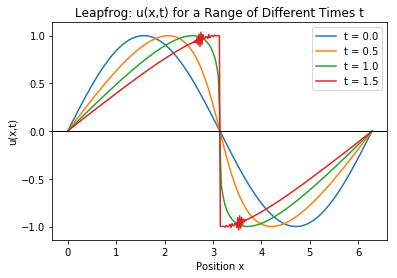

Total seconds to calculate:  0.008232831954956055


In [4]:
######### Modified Leapfrog Method ########

u = np.sin(x)  # reset u(x,t=0) - changed by previous calculations
plt.plot(x,u, label = 't = 0.0') # plot initial t

t = h # set current time
Tf += 1e-6 # add small epsilon so that loops including Tf

start = time() # record start time
u_half = u - 0.5*h*u*eps*np.cos(x) # first Euler step
u_min = np.copy(u) # define first u(t-h), labelled u_min
while t < Tf: # loop until t = Tf s
    # calculate next u (u(t+h))
    u[1:N] = u_min[1:N] -0.5*b*(u_half[2:N+1]**2 - u_half[0:N-1]**2)
    # Next u_min (t-h) is current u_half (t), Next u_half (t) is current u (t+h)
    u_min, u_half = np.copy(u_half), np.copy(u)
    
    # plot result for certain times
    if abs(t-0.5)<1e-3: plt.plot(x,u, label = 't = 0.5')
    elif abs(t-1.0)<1e-3: plt.plot(x,u, label = 't = 1.0')
    elif abs(t-1.5)<1e-3: plt.plot(x,u, label = 't = 1.5')
    
    t += h # increment time

end = time() # record end time
plt.legend()
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Leapfrog: u(x,t) for a Range of Different Times t')
plt.ylabel('u(x,t)')
plt.xlabel('Position x')
plt.show()
print('Total seconds to calculate: ', end - start)

# Discussion

We find that the Lax-Wendroff method is now more stable, more accurate, but slower than than the leapfrog method. When i say stable, i mean refer to the artifacts that appear after \~ 1.3s in the Leapfrog method. With the Lax-Wendroff method they are still present, but are much smaller (Barely visible using odd $N$, but visible using even $N$. Try it!). This is not a surprise as during the derivation of the Lax-Wendroff method, we found ways to express decond order derivatives in terms of first order derivatives. That means that even though our final expression in expressed only in first order finite differences, it is still efeectively second order. This is also why it takes longer to run, there are more calculations given by the equation at each step. However, it could be noted that it takes less memory at each step due to the ability to update the same array on each loop. The leapfrog method on the other hand requires 3 different arrays for each timestep. Despite the hugher method and relative inaccuracy, the Leapfrog method is much faster (here 0.008s as opposed to 0.025s). Each step requires much less computation due to the simplicity of the equations. The largest downside of the Leapfrog method is that the inacuracy leads to instability. Especially if we consider that the Leapfrog method starts with an Euler step, the most crude method of all, it is hardly a surprise that the Lax-Wendroff method is more accurate. In summary:

| **Lax-Wendroff** | **Modified Leapfrog** |
| :---: | :---: |
| $\oplus$ Smaller artifacts | $\ominus$ Larger artifacts |
| $\oplus$ Accurate (to 2$^\text{nd}$ order) | $\ominus$ Inaccurate (1$^\text{st}$ order) |
| $\ominus$ Slower (0.025s) | $\oplus$ Faster (0.008s) |
| $\oplus$ Requires less memory | $\ominus$ Requires $3 \times$ more memory |

<!---  NOTE: INCLUDE THIS AND IGNORE ABOVE FOR PDF CONVERSION
 
\begin{tabular}{ c | c }			
  \textbf{Lax-Wendroff} & \textbf{Modified Leapfrog} \\
  \hline
  $\oplus$ Smaller artifacts & $\ominus$ Larger artifacts \\
  $\oplus$ Accurate (to 2$^\text{nd}$ order) & $\ominus$ Inaccurate (1$^\text{st}$ order) \\
  $\ominus$ Slower (0.025s) & $\oplus$ Faster (0.010s) \\
  $\oplus$ Requires less memory & $\ominus$ Requires $3 \times$ more memory \\
\end{tabular} --->